In [1]:
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from matrix_creation import polynomial_features,scale_features_by_intercept_use
from main_methods import OLS_parameters,Ridge_parameters
from errors import MSE,R2
from plotting_exploration import plot_mse,plot_r2,explore_lambda,explore_polynomial_degree
from GD_OLS import gradient_descent_OLS,gradient_descent_OLS_momentum,ADAgrad_OLS,RMSprop_OLS,ADAM_OLS
from GD_Ridge import gradient_descent_ridge,gradient_descent_ridge_momentum,ADAgrad_Ridge,RMSprop_Ridge,ADAM_Ridge

In [2]:
# Runge's function
# parameters to explore
n_datapoints = 100 # changed and ran code with different values. Could have been implemented as a list and looped over, but regarded as not necessary.
standard_deviation = 0.1 # for noise, should we play around with this values as well in analysis?

lambda_range = (-1,-5) # range of lambda values for np.log
lambda_n = 50 # number lambda values to explore

np.random.seed(250)  # ensure reproducibility

# generating data without noise
x = np.linspace(-1, 1, num=n_datapoints)
y = 1 / (1 + 25 * x**2)

# generating data with noise
x_noise = np.linspace(-1, 1, num=n_datapoints) + np.random.normal(0, standard_deviation, n_datapoints)
y_noise = 1 / (1 + 25 * x_noise**2)


In [3]:
def explore_eta(X_train,X_test,y_train,y_test,num_iters,lam,verbose=False):
    # Hyperparameters
    eta_list = [0.00001,0.0001,0.001, 0.01, 0.1,0.12,0.121] # Learning rates to test
    #eta_list = [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4] # Learning rates to test

    mse_train_OLS = []
    mse_test_OLS = []
    r2_train_OLS  = []
    r2_test_OLS = []

    mse_train_Ridge = []
    mse_test_Ridge = []
    r2_train_Ridge  = []
    r2_test_Ridge = []

    for eta in eta_list: # Loop over each learning rate
        
        theta_gdOLS = gradient_descent_OLS(X_train, y_train, eta, num_iters)
        theta_gdRidge = gradient_descent_ridge(X_train, y_train, eta, lam, num_iters)
        
        y_tilde_trainOLS = X_train @ theta_gdOLS
        y_tilde_testOLS = X_test @ theta_gdOLS
        y_tilde_trainRidge = X_train @ theta_gdRidge
        y_tilde_testRidge = X_test @ theta_gdRidge

        #Calculate MSE for         
        mse_train_gdOLS = MSE(y_train,y_tilde_trainOLS)
        mse_test_gdOLS = MSE(y_test,y_tilde_testOLS)
        mse_train_gdRidge = MSE(y_train,y_tilde_trainRidge)
        mse_test_gdRidge = MSE(y_test,y_tilde_testRidge)
        #if verbose: print(f"Lambda: {l}, MSE_train_ridge: {mse_train_ridge}, MSE_test_OLS: {mse_test_ridge}")
        
        mse_train_OLS.append(mse_train_gdOLS)
        mse_test_OLS.append(mse_test_gdOLS)
        mse_train_Ridge.append(mse_train_gdRidge)
        mse_test_Ridge.append(mse_test_gdRidge)

        # Calculate R2 for training and test data
        r2_train_gdOLS = R2(y_train, y_tilde_trainOLS)
        r2_test_gdOLS = R2(y_test, y_tilde_testOLS)
        r2_train_OLS.append(r2_train_gdOLS)
        r2_test_OLS.append(r2_test_gdOLS)
        #if verbose: print(f"Lambda: {l}, R2_train_ridge: {r2_train_ridge}, R2_test_ridge: {r2_test_ridge}")

        r2_train_gdridge = R2(y_train, y_tilde_trainRidge)
        r2_test_gdridge = R2(y_test, y_tilde_testRidge)
        r2_train_Ridge.append(r2_train_gdridge)
        r2_test_Ridge.append(r2_test_gdridge)
        #if verbose: print(f"Lambda: {l}, R2_train_ridge: {r2_train_ridge}, R2_test_ridge: {r2_test_ridge}")

    return eta_list,mse_train_OLS,mse_test_OLS,mse_train_Ridge,mse_test_Ridge,r2_train_gdOLS,r2_test_Ridge

 

In [4]:
# No noise
# creating design matrix with polynomial features: p
p = 15
use_intercept = True

X = polynomial_features(x, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. 

# test and train dataset, and scaling of X_train and X_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train_scaled, X_test_scaled = scale_features_by_intercept_use(X_train, X_test, use_intercept)


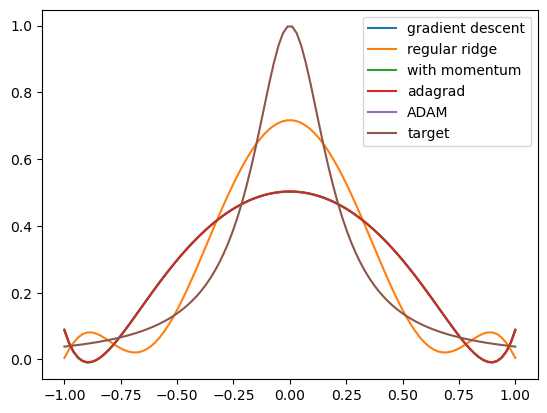

In [8]:
theta = gradient_descent_ridge(X,y,0.15,0.01,1000)
theta_n = Ridge_parameters(X,y,0.01)
theta_m = gradient_descent_ridge_momentum(X,y,0.15,0.01,1000,0.989)
theta_ad = ADAgrad_Ridge(X,y,0.15,0.01,1000)
theta_rms = RMSprop_Ridge(X,y,0.15,1000)
theta_ADAM = ADAM_Ridge(X,y,0.15,1000)


y_tilde = X @ theta
y_tilde_c = X @ theta_n
y_tilde_m = X @ theta_m
y_tilde_ad = X @ theta_ad
y_tilde_ADAM = X @ theta_ADAM

plt.plot(x,y_tilde,label="gradient descent")
plt.plot(x,y_tilde_c,label="regular ridge")
plt.plot(x,y_tilde_m,label="with momentum")
plt.plot(x,y_tilde_ad,label="adagrad")
plt.plot(x,y_tilde_ADAM,label="ADAM")

plt.plot(x,y,label="target")

plt.legend()

Initally, the step is too small, so with the small amount of iterations the steps taken don't actually end up at the minimum, with a larger step size the small-ish number of iterations is sufficient to apporiach the minimum. 

look at the mse of all methods for eta with same eta varying number of iterataions, mse should shink quicker for the the adaptive learning rates than the regular gradient descent.

also look at the same thing (mse vs. eta and mse vs. iterations for all methods) for stochastic gradient descent

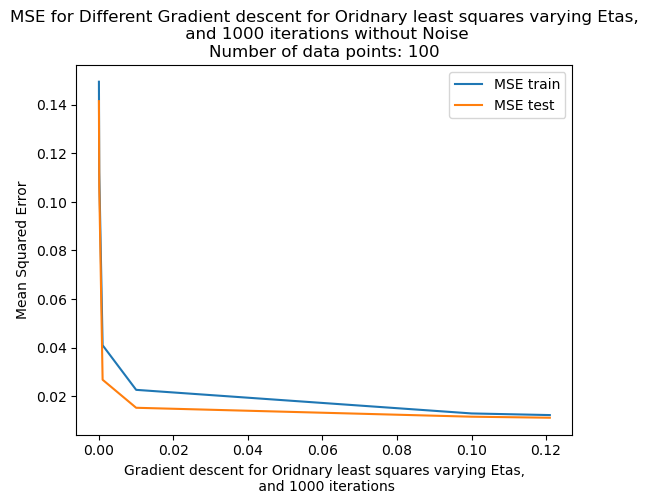

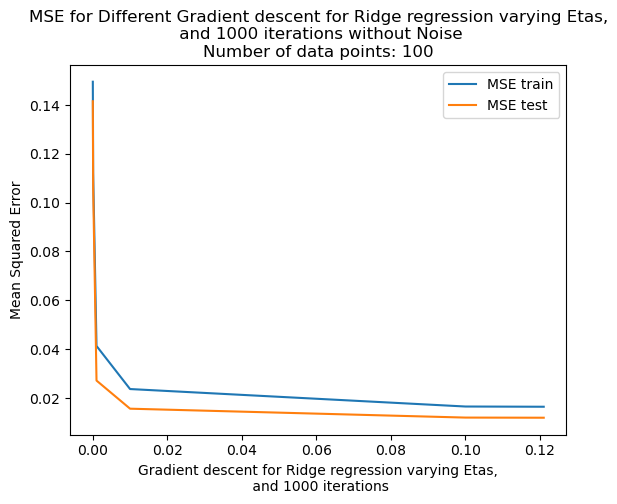

[np.float64(0.14148500663176308), np.float64(0.10604088447169989), np.float64(0.02706400842292557), np.float64(0.015541832189030472), np.float64(0.011898053537130849), np.float64(0.011843412526598408), np.float64(0.011841288509249849)]


In [195]:
num_iters = 1000
lam = 0.01
etas,mse_train_OLS,mse_test_OLS,mse_train_Ridge,mse_test_Ridge,r2_train_gdOLS,r2_test_Ridge = explore_eta(X_train_scaled,X_test_scaled,y_train,y_test,num_iters,lam)
#plt.plot(etas,mse_test_Ridge,'o-')
#plt.plot(etas,mse_train_Ridge,'o-')
plot_mse(n_datapoints,etas,"Gradient descent for Oridnary least squares varying Etas,\n and 1000 iterations",mse_train_OLS,mse_test_OLS)
plot_mse(n_datapoints,etas,"Gradient descent for Ridge regression varying Etas,\n and 1000 iterations",mse_train_Ridge,mse_test_Ridge)
print(mse_test_Ridge)

In [ ]:
#same for stochastic
def explore_eta_stochastic(X_train,X_test,y_train,y_test,num_iters,lam,verbose=False):
    # Hyperparameters
    eta_list = [0.00001,0.0001,0.001, 0.01, 0.1, 0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9] # Learning rates to test
    #eta_list = [0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4] # Learning rates to test

    mse_train_OLS = []
    mse_test_OLS = []
    r2_train_OLS  = []
    r2_test_OLS = []

    mse_train_Ridge = []
    mse_test_Ridge = []
    r2_train_Ridge  = []
    r2_test_Ridge = []

    for eta in eta_list: # Loop over each learning rate
        
        theta_gdOLS = gradient_descent_OLS(X_train, y_train, eta, num_iters)
        theta_gdRidge = gradient_descent_ridge(X_train, y_train, eta, lam, num_iters)
        
        y_tilde_trainOLS = X_train @ theta_gdOLS
        y_tilde_testOLS = X_test @ theta_gdOLS
        y_tilde_trainRidge = X_train @ theta_gdRidge
        y_tilde_testRidge = X_test @ theta_gdRidge

        #Calculate MSE for         
        mse_train_gdOLS = MSE(y_train,y_tilde_trainOLS)
        mse_test_gdOLS = MSE(y_test,y_tilde_testOLS)
        mse_train_gdRidge = MSE(y_train,y_tilde_trainRidge)
        mse_test_gdRidge = MSE(y_test,y_tilde_testRidge)
        #if verbose: print(f"Lambda: {l}, MSE_train_ridge: {mse_train_ridge}, MSE_test_OLS: {mse_test_ridge}")
        
        mse_train_OLS.append(mse_train_gdOLS)
        mse_test_OLS.append(mse_test_gdOLS)
        mse_train_Ridge.append(mse_train_gdRidge)
        mse_test_Ridge.append(mse_test_gdRidge)

        # Calculate R2 for training and test data
        r2_train_gdOLS = R2(y_train, y_tilde_trainOLS)
        r2_test_gdOLS = R2(y_test, y_tilde_testOLS)
        r2_train_OLS.append(r2_train_gdOLS)
        r2_test_OLS.append(r2_test_gdOLS)
        #if verbose: print(f"Lambda: {l}, R2_train_ridge: {r2_train_ridge}, R2_test_ridge: {r2_test_ridge}")

        r2_train_gdridge = R2(y_train, y_tilde_trainRidge)
        r2_test_gdridge = R2(y_test, y_tilde_testRidge)
        r2_train_Ridge.append(r2_train_gdridge)
        r2_test_Ridge.append(r2_test_gdridge)
        #if verbose: print(f"Lambda: {l}, R2_train_ridge: {r2_train_ridge}, R2_test_ridge: {r2_test_ridge}")

    return eta_list,mse_train_OLS,mse_test_OLS,mse_train_Ridge

#### without noise

In [ ]:
#all methods for constant eta

#### with noise

In [6]:
# With noise
# creating design matrix with polynomial features: p
p = 15 # polynomial degree
use_intercept = True #include or exclude intercept

X_noise = polynomial_features(x_noise, p,intercept=use_intercept) # intercept=True gives intercept column = 0 in standard scaler if intercept is True, and hence division by 0. Leaving intercept out since Ridge regression handles this

# test and train dataset, and scaling of X_train and X_test
X_train_noise, X_test_noise, y_train_noise, y_test_noise = train_test_split(X_noise, y_noise, test_size=0.2)
X_train_scaled_noise, X_test_scaled_noise = scale_features_by_intercept_use(X_train_noise, X_test_noise, use_intercept)
